# GPS data: csv to json converter

<div style="background-color:black;color:white;padding:20px;">
<p>M. I. Pedro José Correa Caicedo</p>
</div>

### 1) Import libraries:

In [95]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2) Import data:

In [96]:
df=pd.read_csv('data_GPS.csv')
df.head()

,route,lat sensor,lon sensor
0,r1,20.537055,-100.815725
1,r1,20.537036,-100.815740
2,r1,20.537016,-100.815763
3,r1,20.536995,-100.815783
4,r1,20.536980,-100.815804


### 3) Separating data :

#### a) Full vectors:

In [97]:
r=df['route']
lat=df['lat sensor']
lon=df['lon sensor']
Nr=len(r.unique())
print(Nr)
rn=r.unique()
print(rn[0])

1
r1


#### b) Vectors separated by route:

In [98]:
rv=[]
latv=[]
lonv=[]
for nr in range(Nr):
    ##build the list of lists 
    latv.append([])
    lonv.append([])
    datov.append([])
    for ru in range(len(r)):
        if(r[ru]=='r'+str(nr+1)):
            latv[nr].append(lat[ru])
            lonv[nr].append(lon[ru])
            datov[nr].append([lat[ru],lon[ru]])

print(len(latv[0]))


474


### 4) Creating and adding data to the directory:

##### The directory structure that is wanted: 
<img src="./images/json_struc.PNG" alt="Zones" width="250" height="250" />

##### Fig.1  .json directory.

In [99]:
#creating a directory
Dict_GPS = {}
for rut in range(Nr):#one cycle for route
    for dat in range(len(latv[rut])):#one cycle for data
        # adding a new column
        if "route" in Dict_GPS:
            Dict_GPS["route"].append(str(rn[rut]))
        else:
            Dict_GPS["route"] = [str(rn[rut])]
        
        # adding a new column and data inside the sensor column. 
        if "sensor" in Dict_GPS:
            Dict_GPS["sensor"].append({"id":dat,"lat": latv[rut][dat],"lon": lonv[rut][dat]})
        
        # adding data to end of sensor column
        else:
            Dict_GPS["sensor"] = [{"id":dat,"lat": latv[rut][dat],"lon": lonv[rut][dat]}]

    
## json dumps data 
Dict_GPSd=json.dumps(Dict_GPS)
print(Dict_GPSd)

{"route": ["r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1", "r1",

### 5) Creating the .json file:

In [100]:
with open('GPS_datson.json','w') as file:
    json.dump(Dict_GPS,file)


### 6) Import the .json file:

In [101]:
df2=pd.read_json('GPS_datson.json')
df2.head(10)

,route,sensor
0,r1,"{'id': 0, 'lat': 20.537055, 'lon': -100.8157245}"
1,r1,"{'id': 1, 'lat': 20.5370355, 'lon': -100.81573..."
2,r1,"{'id': 2, 'lat': 20.53701617, 'lon': -100.8157..."
3,r1,"{'id': 3, 'lat': 20.536995, 'lon': -100.815783..."
4,r1,"{'id': 4, 'lat': 20.53698033, 'lon': -100.8158..."
5,r1,"{'id': 5, 'lat': 20.53696067, 'lon': -100.815823}"
6,r1,"{'id': 6, 'lat': 20.536943, 'lon': -100.8158337}"
7,r1,"{'id': 7, 'lat': 20.5369255, 'lon': -100.81586..."
8,r1,"{'id': 8, 'lat': 20.5369195, 'lon': -100.81590..."
9,r1,"{'id': 9, 'lat': 20.536899, 'lon': -100.8159462}"


### 7) Data separated from the .json file:

In [102]:
# Routes data
rson=df2["route"]
# sensor data
sensorson=df2["sensor"][0]
# separeted for id, lat and lon 
idson=sensorson["id"]
latson=sensorson["lat"]
lonson=sensorson["lon"]

print(rson)
print(sensorson)
print(idson)
print(latson)
print(lonson)
print(len(rson))

0      r1
1      r1
2      r1
3      r1
4      r1
       ..
469    r1
470    r1
471    r1
472    r1
473    r1
Name: route, Length: 474, dtype: object
{'id': 0, 'lat': 20.537055, 'lon': -100.8157245}
0
20.537055
-100.8157245
474


In [103]:
rsonv=[]
latsonv=[]
lonsonv=[]

for nr in range(Nr):
    ##build the list of lists
    rsonv.append([])
    latsonv.append([])
    lonsonv.append([])
    
    for ru in range(len(rson)):
        if(rson[ru]=='r'+str(nr+1)):
            rsonv[nr].append(rson[ru])
            latsonv[nr].append(lat[ru])
            lonsonv[nr].append(lon[ru])


print(len(latsonv[0]))

474


### 8)  Graphics:

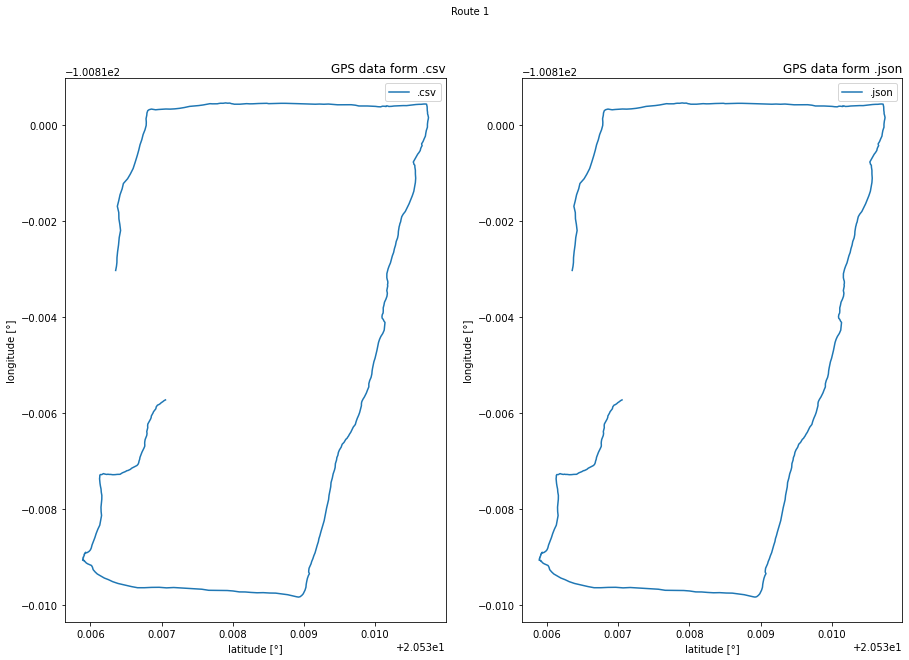

In [104]:
for gr in range(Nr):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle('Route'+' '+str(gr+1),fontsize=10) 
    
    ax[0].plot(latv[gr],lonv[gr],label='.csv')
    ax[0].set_title('GPS data form .csv',loc='right')
    ax[0].set(xlabel='latitude [°]',ylabel='longitude [°]')
    ax[0].legend(loc="upper right")
    
    ax[1].plot(latsonv[gr],lonsonv[gr],label='.json')
    ax[1].set_title('GPS data form .json',loc='right')
    ax[1].set(xlabel='latitude [°]',ylabel='longitude [°]')
    ax[1].legend(loc="upper right")
    
plt.show()